Suppose a business has collected data showing the relationship between dollars spent on advertising (in thousands) versus corresponding sales revenue (in millions). Now, they want to model the relationship between their advertising spending and sales performance. They've hired you to develop this predictive model using the data below.

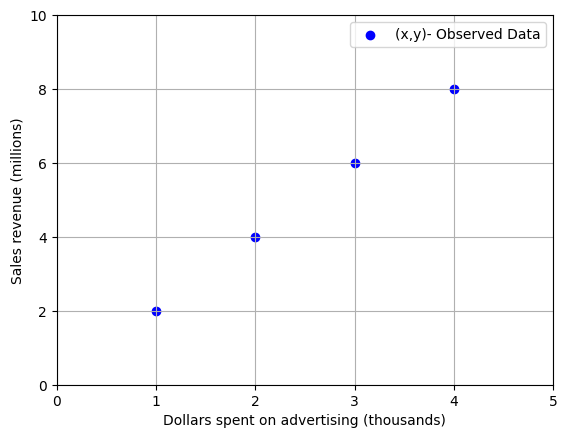

In [1]:
import numpy as np
import matplotlib.pyplot as plt
dollars_spent = [1,2,3,4]
sales_revenue = [2,4,6,8]
plt.scatter(dollars_spent,sales_revenue,marker= "o",color = 'blue',label = "(x,y)- Observed Data")
plt.xlabel("Dollars spent on advertising (thousands)")
plt.ylabel("Sales revenue (millions)")
plt.legend()
plt.ylim([0, 10])
plt.xlim([0, 5])
plt.grid(True)
plt.show()

We decided the relationship is linear. This means our predictive model takes the form
$$\hat{y} = mx.$$
Note we are assuming the inital value is 0 for simplicity.

For example, for $m = .5$ we get the model
$$\hat{y} = .5x$$ 
which is plotted along with the observed data below.

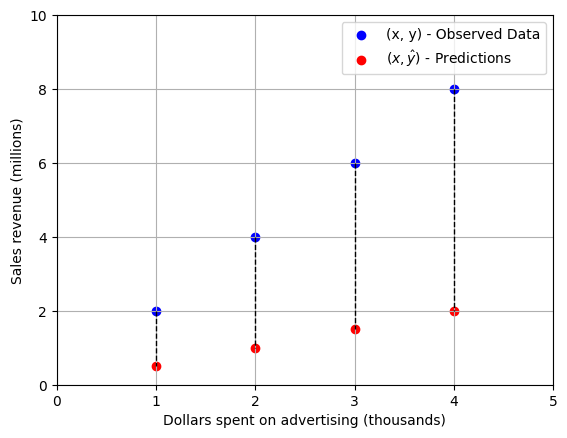

In [4]:
import numpy as np
import matplotlib.pyplot as plt

dollars_spent = np.array([1, 2, 3, 4])
sales_revenue = np.array([2, 4, 6, 8])

model_func = lambda x: 0.5 * x
predicted = model_func(dollars_spent)

# Scatter plots
plt.scatter(dollars_spent, sales_revenue, color='blue', label='(x, y) - Observed Data')
plt.scatter(dollars_spent, predicted, color='red', label=r'$(x, \hat{y})$ - Predictions')

# Dashed lines between observed and predicted points
for x, y_obs, y_pred in zip(dollars_spent, sales_revenue, predicted):
    plt.plot([x, x], [y_obs, y_pred], 'k--', linewidth=1)  # vertical dashed line

plt.xlabel("Dollars spent on advertising (thousands)")
plt.ylabel("Sales revenue (millions)")
plt.legend()
plt.ylim([0, 10])
plt.xlim([0, 5])
plt.grid(True)
plt.show()

The dashed lines represent the distance between the observed sales and the predicted sales for each input value. Using this distance as a guide, we developed the mean-squared-error (MSE) cost function
$$C(m) = \frac{1}{4}\sum_{i=1}^4 (y_i-mx_i)^2$$
that computes the total error for a given choice of $m$.

In class we computed $C(m)$ for a range of $m$ values and produced the plot below.

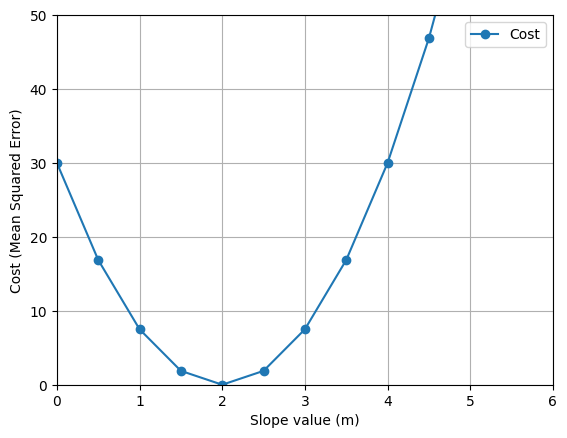

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------
# Example data: advertising dollars vs. sales revenue
# ---------------------------------------------
dollars_spent = np.array([1, 2, 3, 4])
sales_revenue = np.array([2, 4, 6, 8])

# ---------------------------------------------
# Step 1: Create a range of possible slope values (our model parameters)
# ---------------------------------------------
# We'll test slope values from 0 to 5 in steps of 0.5
slope_choices = np.arange(0, 5.5, 0.5)

# ---------------------------------------------
# Step 2: Generate predictions for each slope
# ---------------------------------------------
# Each slope defines a line:  ŷ = m * x
# We compute predicted y-values for each slope and each data point
predictions = slope_choices[:, np.newaxis] * dollars_spent

# ---------------------------------------------
# Step 3: Compute the cost for each slope
# ---------------------------------------------
# We'll use Mean Squared Error (MSE):
#     Cost = (1/n) * Σ (y - ŷ)²
cost = (1 / len(sales_revenue)) * np.sum((sales_revenue - predictions) ** 2, axis=1)

# ---------------------------------------------
# Step 4: Plot the cost function
# ---------------------------------------------
plt.plot(slope_choices, cost, marker="o", label="Cost")
plt.xlabel("Slope value (m)")
plt.ylabel("Cost (Mean Squared Error)")
plt.xlim([0, 6])
plt.ylim([0, 50])
plt.grid(True)
plt.legend()
plt.show()


From this graph it's clear that the choice of $m$ that results in the smallest mean-squared-error is $m=2$, which means the model
$$\hat{y} = 2x$$
would be a perfect fit for the data.

Okay, but where was the Calculus?

Since the slope, $m$, that results in the smalles mean-squared-error, gives us the equation of the line that best fits our data, the cost function
$$C(m) = \frac{1}{4}\sum_{i=1}^4 (y_i-mx_i)^2$$
is the $\textbf{objective function}$ we will minimize.

Since we know that the slope of the tangent line is zero at minimums (and maximums), to minimize this function we take the derivative, set it equal to zero, and solve for the input variable $m$.

$$
\begin{aligned}
C(m) &= \frac{1}{4}\sum_{i=1}^4 2(y_i-mx_i)(-x_i)\\
     &= \frac{1}{4}\sum_{i=1}^4 -2x_i(y_i-mx_i)\\
     &= \frac{1}{4}\sum_{i=1}^4 -2x_iy_i+2mx_i^2\\
     & = \frac{1}{4}(-2x_1y_1+2mx_1^2 + -2x_2y_2+2mx_2^2+-2x_3y_3+2mx_3^2+-2x_4y_4+2mx_4^2)\\
     & = -.5x_1y_1+.5mx_1^2 + -.5x_2y_2+.5mx_2^2+-.5x_3y_3+.5mx_3^2+-.5x_4y_4+.5mx_4^2)\\
     & = -.5(1)(2)+.5m(1)^2 + -.5(2)(4)+.5m(2)^2+-.5(3)(6)+.5m(3)^2+-.5(4)(8)+.5m(4)^2)
\end{aligned}
$$

Let's have the computer take it from here.

In [6]:
import sympy as sp

m = sp.symbols('m')

expr = (-.5*1*2 + .5*m*(1)**2- .5*2*4 + .5*m*(2)**2- .5*3*6 + .5*m*(3)**2- .5*4*8 + .5*m*(4)**2)

print("Simplified:", sp.simplify(expr))

Simplified: 15.0*m - 30.0


Yay, that was nice of Python to do that for us. Now we know that
$$C'(m) = 15m-30$$
so we are going to set this equal to zero, and solve for $m$.

In [7]:
import sympy as sp

m = sp.symbols('m')
equation = sp.Eq(15*m - 30, 0)  # use sp.Eq instead of Equation
solution = sp.solve(equation, m)

print("Solution: m =", solution)

Solution: m = [2]


We see that $m =2$ is a critical point of the function $C(m)$. Since we graphed it we already know this is a minimum, not a maximum, but if we were not sture we could use test points on either side of $m=2$ to classify it.

In this case, the mean-squared-error formula and our model (line) were simple enough that we could solve the equation
$$\frac{d}{dm}(C(m))=0$$
exactly. 

This is not usually the case So let's use this example to understand a very powerful technique for finding the minimum of a function, $\textbf{gradient descent}$.

To start gradient descent, we need to choose an initial guess, $m_0$. This should feel similar to Euler's method.

Given $m_0 = .75$, use the function below to compute the cost
$$C(.75) = \frac{1}{4}\sum_{i=1}^4 (y_i-.75x_i)^2.$$

In [8]:
# make a function to do the dirty work for us
def cost_func(m,input_vals,output_vals):
    return (1/len(output_vals))*np.sum((output_vals-m*input_vals)**2)
# the input and ouput vals depend on the observed data
dollars_spent = np.array([1, 2, 3, 4])
sales_revenue = np.array([2, 4, 6, 8])

# choose an m
curr_m = .75
# save the cost for a given choice of m in the variable curr_cost
curr_cost = cost_func(curr_m,dollars_spent,sales_revenue)
# print the result
print(curr_cost)

11.71875


This tells us that when $m = .75$, the error (or cost) is $11.7185$. Since our goal is to make the error as close to zero as possible, we need to adjust our guess.

However, we won’t just guess randomly, we’ll use the derivative to guide our next step. How?
$$m_1 = m_0-C'(m_0)*\eta.$$

Here, $\eta$ (pronounced "eta"), is the "learning rate." When using Euler's method we chose a $\Delta t$ value, the learning rate functions in the same way by scaling the change arrow. Yet another place where we have decided that in this context we call the derivative or slope of tangent line the gradient.

Let's choose $\eta = .1$.

In [9]:
# make a function to do the dirty work for us
def gradient_func(m):
    return 15*m-30

# choose an m
curr_m = .75
# save the slope of the tangent line for a given choice of m
gradient = gradient_func(curr_m)
# print the result
print(gradient)

-18.75


So we have
$$
\begin{aligned}
m_1 & = .75 -(-18.75*.1)\\
    &= .75 +1.875 \\
    & = 2.625
\end{aligned}
$$

Let's take a look at the graph to visualize how exactly gradient descent works.

What happened here?

Let $m_0 = .75, \eta = .05$ and use the code cell below to complete the table.

In [11]:
def gradient_func(m):
    return 15*m-30
#choice of learning rate
eta = .05
#current m value
curr_m = .75
#gradient at curr_m
gradient = gradient_func(curr_m)
print("The gradient at m = {} is {}.".format(curr_m,gradient))
#next m
next_m = curr_m-(gradient*eta)
print("The next guess for the slope is {}.".format(next_m))

The gradient at m = 0.75 is -18.75.
The next guess for the slope is 1.6875.
